In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [4]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

In [5]:
df_scac = df[['special_conditions_at_site', 'accident_severity']]
df_scac

,special_conditions_at_site,accident_severity
0,0,3
1,0,3
6,0,3
7,0,3
8,0,3
...,...,...
285307,0,3
285312,0,3
285313,0,3
285314,0,3


In [6]:
df_scac['special_conditions_at_site'].unique()

array([0, 4, 1, 6, 5, 3, 2, 7], dtype=int64)

In [7]:
df_scac['special_conditions_at_site'].replace(0, 'none', inplace=True)
df_scac['special_conditions_at_site'].replace(1, 'traffic signal out', inplace=True)
df_scac['special_conditions_at_site'].replace(2, 'traffic signal out', inplace=True)
df_scac['special_conditions_at_site'].replace(3, "can't see road sign", inplace=True)
df_scac['special_conditions_at_site'].replace(4, 'roadworks', inplace=True)
df_scac['special_conditions_at_site'].replace(5, 'road surface defective', inplace=True)
df_scac['special_conditions_at_site'].replace(6, 'oil or diesel', inplace=True)
df_scac['special_conditions_at_site'].replace(7, 'mud', inplace=True)
df_scac

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,special_conditions_at_site,accident_severity
0,none,3
1,none,3
6,none,3
7,none,3
8,none,3
...,...,...
285307,none,3
285312,none,3
285313,none,3
285314,none,3


In [8]:
df_scac3 = df_scac[df_scac['accident_severity'] == 3]
df_scac2 = df_scac[df_scac['accident_severity'] == 2]
df_scac1 = df_scac[df_scac['accident_severity'] == 1]
df_scac1['special_conditions_at_site'].value_counts()


none                      864
roadworks                   6
road surface defective      4
traffic signal out          3
mud                         1
Name: special_conditions_at_site, dtype: int64

In [9]:
y3 = df_scac3['special_conditions_at_site'].value_counts()
df_scactot = pd.DataFrame({'accident severity 3': y3})
df_scactot

,accident severity 3
none,94970
roadworks,890
traffic signal out,298
can't see road sign,212
oil or diesel,160
mud,78
road surface defective,78


In [10]:
y2 = df_scac2['special_conditions_at_site'].value_counts()
df_scactot.insert(1, 'accident severity 2', y2, True)
df_scactot

,accident severity 3,accident severity 2
none,94970,13076
roadworks,890,90
traffic signal out,298,22
can't see road sign,212,19
oil or diesel,160,36
mud,78,17
road surface defective,78,18


In [11]:
y1 = df_scac1['special_conditions_at_site'].value_counts()
df_scactot.insert(2, 'accident severity 1', y1, True)
df_scactot

,accident severity 3,accident severity 2,accident severity 1
none,94970,13076,864.0
roadworks,890,90,6.0
traffic signal out,298,22,3.0
can't see road sign,212,19,NaN
oil or diesel,160,36,NaN
mud,78,17,1.0
road surface defective,78,18,4.0


In [13]:
df_scactot.fillna(value=0, inplace=True)
df_scactot

,accident severity 3,accident severity 2,accident severity 1
none,94970,13076,864.0
roadworks,890,90,6.0
traffic signal out,298,22,3.0
can't see road sign,212,19,0.0
oil or diesel,160,36,0.0
mud,78,17,1.0
road surface defective,78,18,4.0


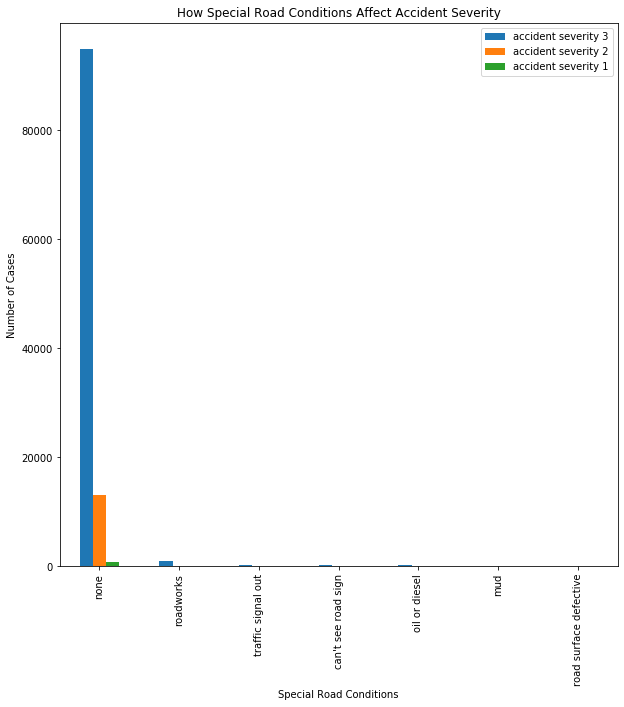

In [14]:
df_scactot.plot(kind='bar', figsize=(10,10))

plt.xlabel('Special Road Conditions')
plt.ylabel('Number of Cases')
plt.title('How Special Road Conditions Affect Accident Severity')
plt.show()

In [16]:
df_scactot_mod = df_scactot
df_scactot_mod.replace(94970, 0, inplace=True)
df_scactot_mod

,accident severity 3,accident severity 2,accident severity 1
none,0,13076,864.0
roadworks,890,90,6.0
traffic signal out,298,22,3.0
can't see road sign,212,19,0.0
oil or diesel,160,36,0.0
mud,78,17,1.0
road surface defective,78,18,4.0


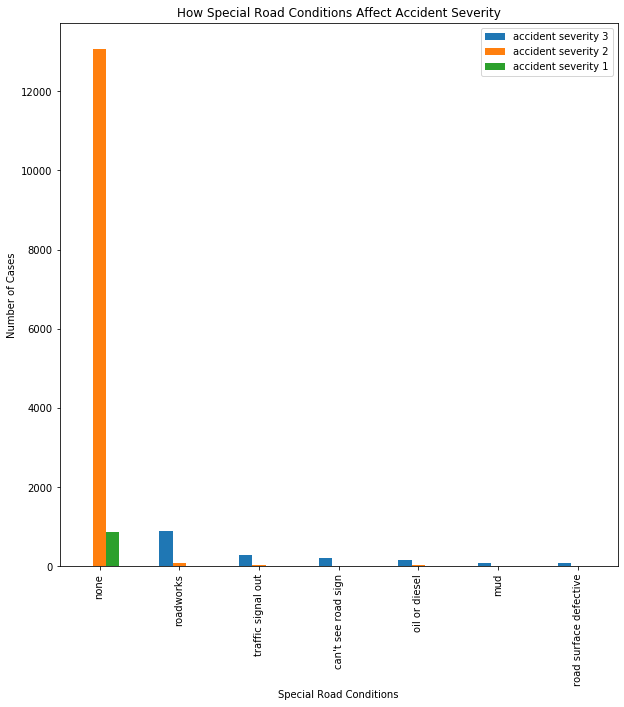

In [17]:
df_scactot_mod.plot(kind='bar', figsize=(10,10))

plt.xlabel('Special Road Conditions')
plt.ylabel('Number of Cases')
plt.title('How Special Road Conditions Affect Accident Severity')
plt.show()